__Importing Packages and Loading Dataset__

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset and set headers (as named on uci irvine website)
headers =  ['word_freq_make',
            'word_freq_address',
            'word_freq_all',
            'word_freq_3d',
            'word_freq_our',
            'word_freq_over',
            'word_freq_remove',
            'word_freq_internet',
            'word_freq_order',
            'word_freq_mail',
            'word_freq_receive',
            'word_freq_will',
            'word_freq_people',
            'word_freq_report',
            'word_freq_addresses',
            'word_freq_free',
            'word_freq_business',
            'word_freq_email',
            'word_freq_you',
            'word_freq_credit',
            'word_freq_your',
            'word_freq_font',
            'word_freq_000',
            'word_freq_money',
            'word_freq_hp',
            'word_freq_hpl',
            'word_freq_george',
            'word_freq_650',
            'word_freq_lab',
            'word_freq_labs',
            'word_freq_telnet',
            'word_freq_857',
            'word_freq_data',
            'word_freq_415',
            'word_freq_85',
            'word_freq_technology',
            'word_freq_1999',
            'word_freq_parts',
            'word_freq_pm',
            'word_freq_direct',
            'word_freq_cs',
            'word_freq_meeting',
            'word_freq_original',
            'word_freq_project',
            'word_freq_re',
            'word_freq_edu',
            'word_freq_table',
            'word_freq_conference',
            'char_freq_;',
            'char_freq_(',
            'char_freq_[',
            'char_freq_exclamation',
            'char_freq_dollar',
            'char_freq_hashtag',
            'capital_run_length_average',
            'capital_run_length_longest',
            'capital_run_length_total',
            'spam']
spam_dataset = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',
                   names=headers, index_col=False, na_values=' ?')

In [3]:
spam_dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


In [4]:
print(spam_dataset.shape)

(4601, 58)


We will now check for null values, and drop them if there are any.

In [5]:
spam_dataset.dropna(inplace=True)

In [6]:
print(spam_dataset.shape)

(4601, 58)


As we can see, there are no null values in the dataset, hence we have the same shape. We will now check the types of the features to see if any are categorical.

In [7]:
spam_dataset.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

Because none of the features are categorical, we do not need to convert the features into dummy variables and we can start comparing alogrithms!

In [8]:
spam_dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


__Helper Functions__

In [9]:
# function to draw heatmap for linear svm
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [10]:
# function to draw heatmap for rbf svm
def draw_heatmap_RBF(acc, acc_desc, gamma_list, C_list):
    plt.figure(figsize = (5,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', 
                     xticklabels=gamma_list, yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(xlabel = '$\gamma$', ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$ and $\gamma$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show() 

In [11]:
# function to draw heatmap for k nearest neighbors
def draw_heatmap_KNN(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [12]:
# function to draw heatmap for decision tree
def draw_heatmap_decisionTree(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t $depth$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [13]:
# function to draw heatmap for random forest
def draw_heatmap_randomForest(acc, acc_desc, f_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=f_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='features')
    plt.title(acc_desc + ' w.r.t $features$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [14]:
# function for linear svm
def linearSVM():
    # create the classifier and perform gridsearch to obtain an optimal C
    classifier = svm.SVC(kernel='linear')
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2, 10**3]) # Different C to try.
    params = {"C": C_list}

    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)
    
    # draw heatmaps for the training and validation results 
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_linear(train_acc.reshape(-1,1), 'linear svm train accuracy', C_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_linear(val_acc.reshape(-1,1), 'linear svm val accuracy', C_list)
    
    # get the training and validation accuracy associated with the best C
    for i,val in enumerate(C_list):
        if val == grid.best_params_['C']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal C to get the most optimal test accuracy
    op_classifier = svm.SVC(kernel = 'linear', C = grid.best_params_['C'] )
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C']

In [15]:
# function for rbf svm
def rbfSVM():
    # create the classifier and perform gridsearch to obtain an optimal C and gamme
    classifier = svm.SVC(kernel = 'rbf')
    gamma_list     = np.array([0.001,0.005,0.01,0.05,0.1,0.5,1,2]) # Different gamma to try.
    C_list = np.array([10**-3, 10**-2, 10**-1,10**0,10**1,10**2,10**3]) # Different C to try.
    param_grid = dict(gamma=gamma_list, C=C_list)
    
    grid = GridSearchCV(estimator = classifier, param_grid = param_grid, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val,Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score'].reshape(7,8)
    draw_heatmap_RBF(train_acc, 'rbf svm train accuracy', gamma_list, C_list)

    val_acc = grid.cv_results_['mean_test_score'].reshape(7,8)
    draw_heatmap_RBF(val_acc, 'rbf svm val accuracy',gamma_list, C_list)
    
    # get the training and validation accuracy associated with the best C and gamma
    for i,val in enumerate(C_list):
        for j, val2 in enumerate(gamma_list):
            if ((val == grid.best_params_['C']) and (val2 == grid.best_params_['gamma'])):
                best_train_acc = train_acc[i,j]
                best_val_acc = val_acc[i,j]
    
    # train the classifier on the most optimal C and gamma to get the most optimal test accuracy 
    op_classifier = svm.SVC(kernel = 'rbf', C = grid.best_params_['C'], gamma = grid.best_params_['gamma'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['C'], grid.best_params_['gamma']

In [16]:
# function for k nearest neighbors 
def knn():
    # create the classifier and perform gridsearch to obtain an optimal number of neighbors
    k_list = [1,2,3,4,5,6,7,8,9,10]
    params = {"n_neighbors": k_list}
    classifier = KNeighborsClassifier()
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_KNN(train_acc.reshape(10,1), 'knn train accuracy', k_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_KNN(val_acc.reshape(10,1), 'knn val accuracy', k_list)
    
    # get the training and validation accuracy associated with the best number of neighbors
    for i,val in enumerate(k_list):
        if val == grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of neighbors to get the most optimal test accuracy
    op_classifier = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['n_neighbors']

In [17]:
# function for decision tree
def decisionTree():
    # create the classifier and perform gridsearch to obtain an optimal  depth
    classifier = tree.DecisionTreeClassifier()
    D_list = [1,2,3,4,5]
    param_grid = {
                  "max_depth": D_list,
                  "criterion": ["entropy"]
                 }
    grid = GridSearchCV(classifier, param_grid, return_train_score = True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_decisionTree(train_acc.reshape(-1,1), 'decision tree train accuracy', D_list)

    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_decisionTree(val_acc.reshape(-1,1), 'decision tree val accuracy', D_list)
    
    # get the training and validation accuracy associated with the best depth
    for i,val in enumerate(D_list):
        if val == grid.best_params_['max_depth']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal depth to get the most optimal test accuracy
    op_classifier = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = grid.best_params_['max_depth'])
    op_classifier.fit(X_train_val, Y_train_val)
    test_acc = op_classifier.score(X_test, Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_depth']

In [18]:
# function for random forest
def randomForest():
    # create the classifier and perform gridsearch to obtain an optimal number of features
    f_list = [1,2,4,6,8,12,16, 20]
    params = {"max_features": f_list}
    classifier = RandomForestClassifier(n_estimators = 1024)
    grid = GridSearchCV(classifier, params, return_train_score=True, n_jobs = -1)
    grid.fit(X_train_val, Y_train_val)

    # draw heatmaps for the training and validation results
    train_acc = grid.cv_results_['mean_train_score']
    draw_heatmap_randomForest(train_acc.reshape(8,1), 'random forest train accuracy', f_list)
    
    val_acc = grid.cv_results_['mean_test_score']
    draw_heatmap_randomForest(val_acc.reshape(8,1), 'random forest val accuracy', f_list)
    
    # get the training and validation accuracy associated with the best number of features
    for i,val in enumerate(f_list):
        if val == grid.best_params_['max_features']:
            best_train_acc = train_acc[i]
            best_val_acc = val_acc[i]
    
    # train the classifier on the most optimal number of features to get the most optimal test accuracy
    op_classifier = RandomForestClassifier(max_features=grid.best_params_['max_features'])
    op_classifier.fit(X_train_val,Y_train_val)
    test_acc = op_classifier.score(X_test,Y_test)
    return test_acc, best_train_acc, best_val_acc, grid.best_params_['max_features']

__Heatmaps and Final Reults__

Train Partition:  0.8


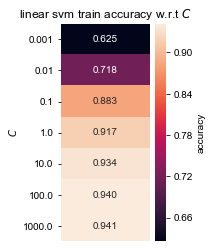

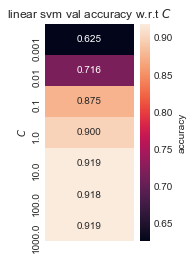

Test Accuracy for Linear SVM =  0.9044715447154471


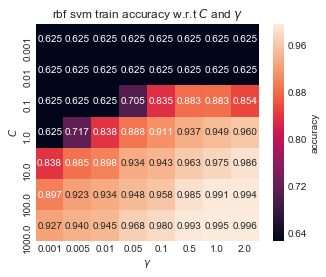

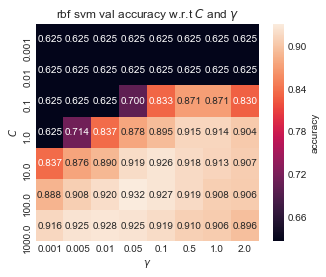

Test Accuracy for RBF SVM =  0.9247967479674797


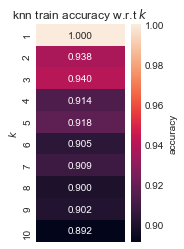

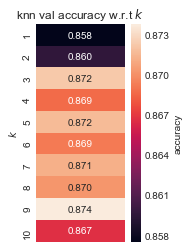

Test Accuracy for K Nearest Neighbors =  0.8577235772357723


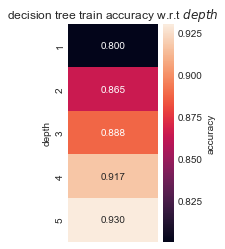

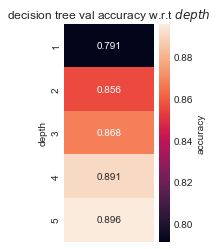

Test Accuracy for Decision Tree =  0.8678861788617886


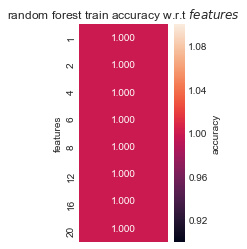

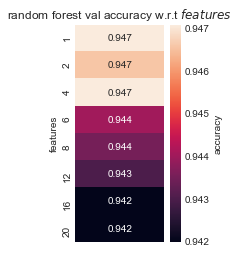

Test Accuracy for Random Forest =  0.9247967479674797


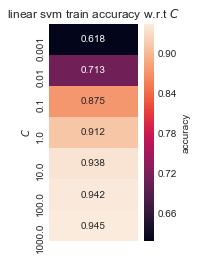

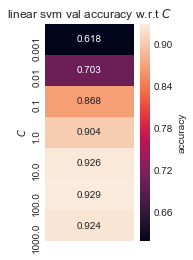

Test Accuracy for Linear SVM =  0.9024390243902439


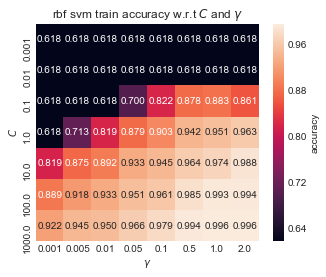

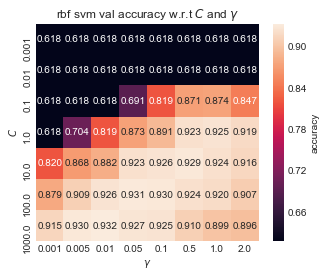

Test Accuracy for RBF SVM =  0.9166666666666666


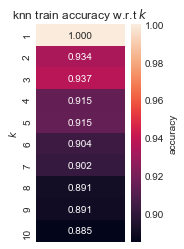

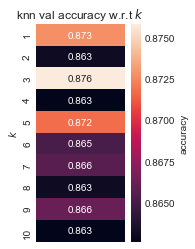

Test Accuracy for K Nearest Neighbors =  0.8841463414634146


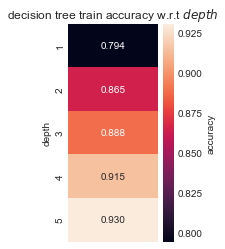

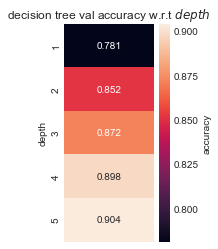

Test Accuracy for Decision Tree =  0.8902439024390244


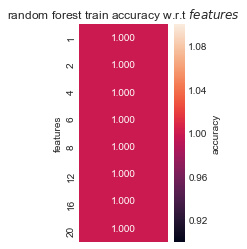

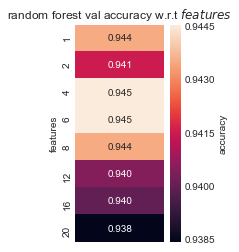

Test Accuracy for Random Forest =  0.9186991869918699


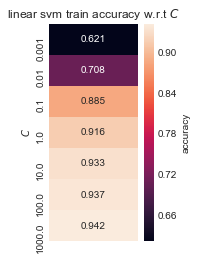

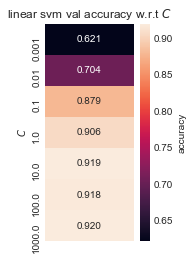

Test Accuracy for Linear SVM =  0.9288617886178862


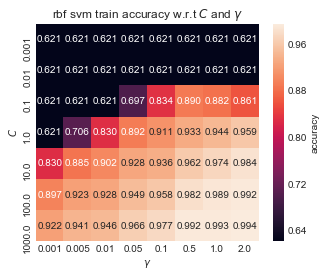

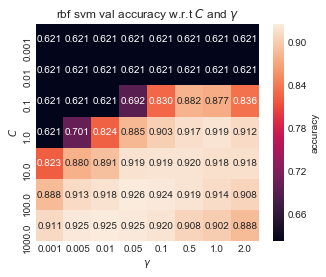

Test Accuracy for RBF SVM =  0.9146341463414634


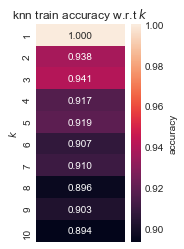

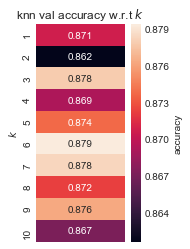

Test Accuracy for K Nearest Neighbors =  0.8699186991869918


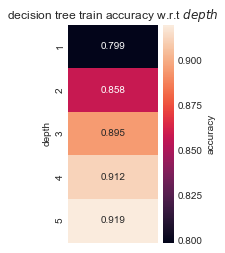

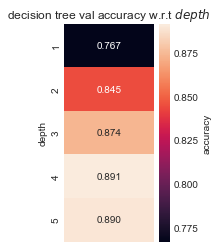

Test Accuracy for Decision Tree =  0.8963414634146342


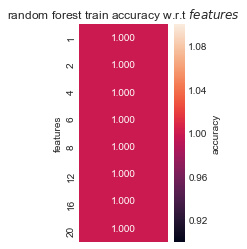

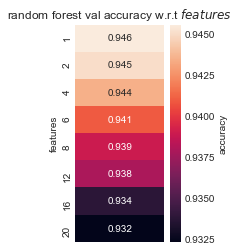

Test Accuracy for Random Forest =  0.926829268292683
Train Partition:  0.5


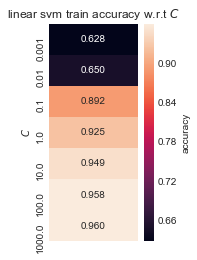

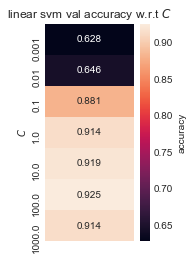

Test Accuracy for Linear SVM =  0.919446704637917


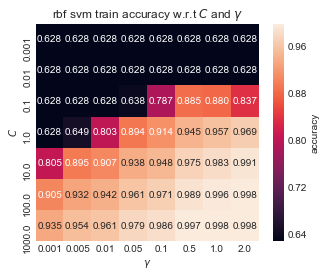

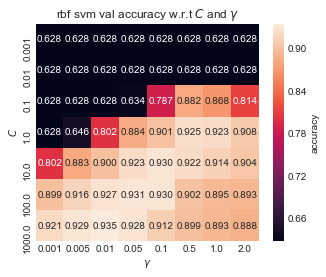

Test Accuracy for RBF SVM =  0.919446704637917


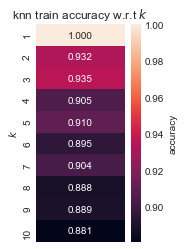

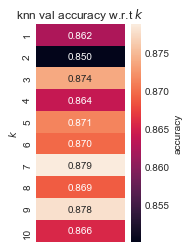

Test Accuracy for K Nearest Neighbors =  0.8812042310821806


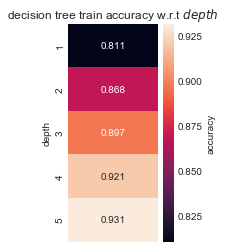

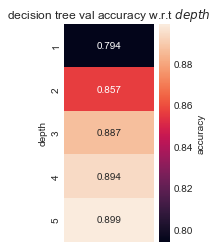

Test Accuracy for Decision Tree =  0.8925956061838893


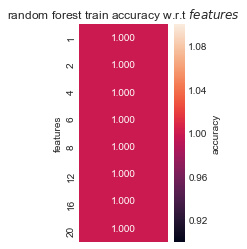

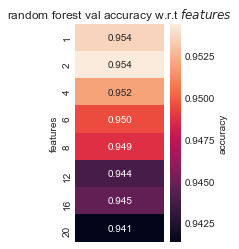

Test Accuracy for Random Forest =  0.9235150528885273


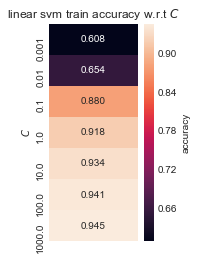

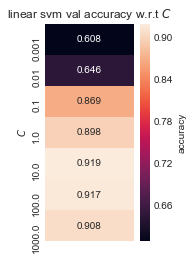

Test Accuracy for Linear SVM =  0.9332790886899919


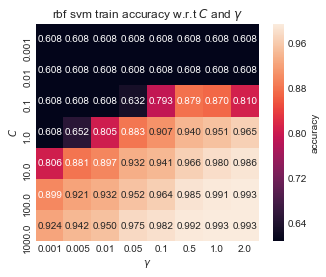

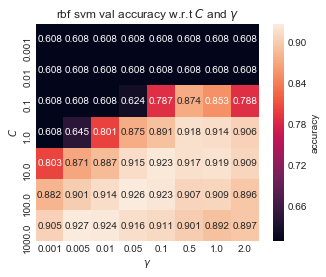

Test Accuracy for RBF SVM =  0.9365337672904801


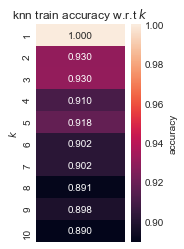

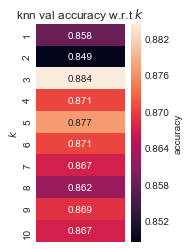

Test Accuracy for K Nearest Neighbors =  0.8836452400325467


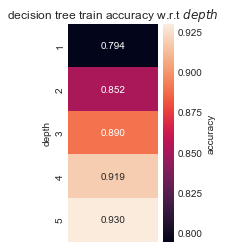

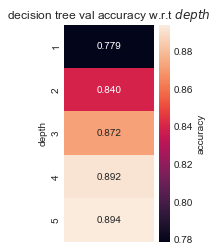

Test Accuracy for Decision Tree =  0.8934092758340114


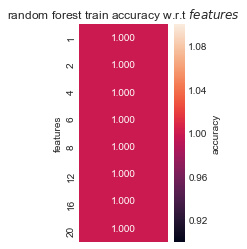

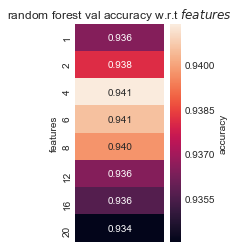

Test Accuracy for Random Forest =  0.934092758340114


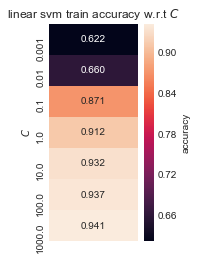

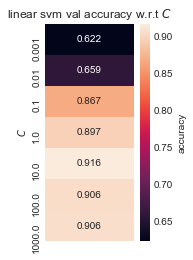

Test Accuracy for Linear SVM =  0.9161920260374288


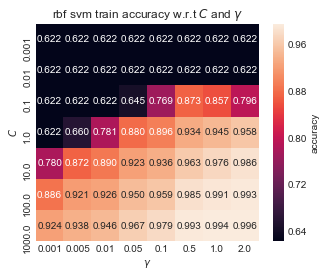

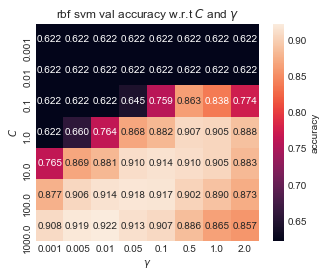

Test Accuracy for RBF SVM =  0.9218877135882831


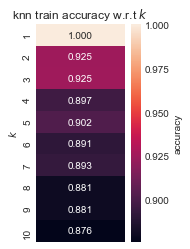

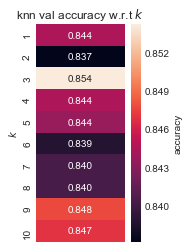

Test Accuracy for K Nearest Neighbors =  0.8657445077298617


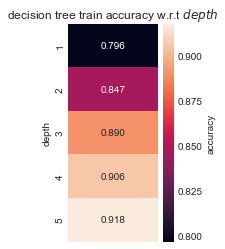

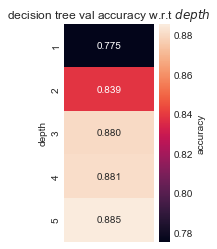

Test Accuracy for Decision Tree =  0.9007323026851098


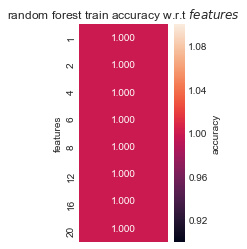

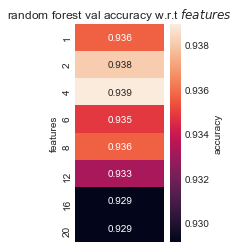

Test Accuracy for Random Forest =  0.9381611065907242
Train Partition:  0.2


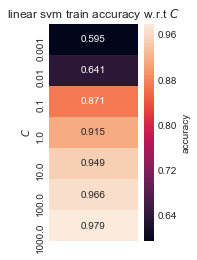

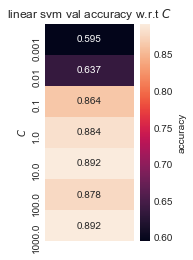

Test Accuracy for Linear SVM =  0.8921668362156663


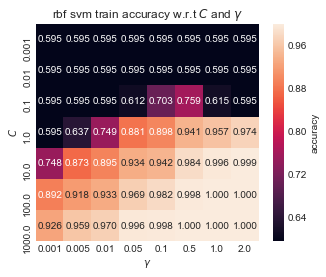

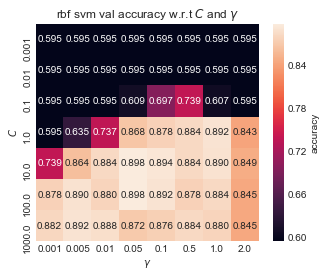

Test Accuracy for RBF SVM =  0.8926754832146491


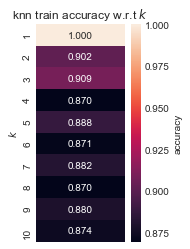

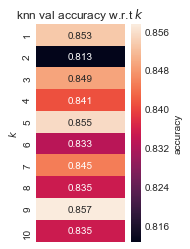

Test Accuracy for K Nearest Neighbors =  0.8560528992878942


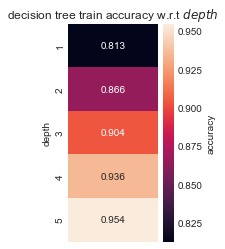

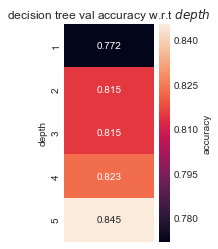

Test Accuracy for Decision Tree =  0.8585961342828077


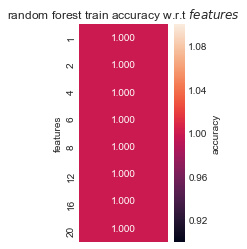

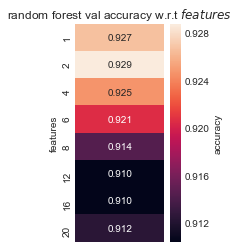

Test Accuracy for Random Forest =  0.9059003051881994


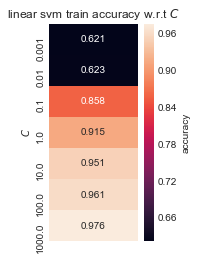

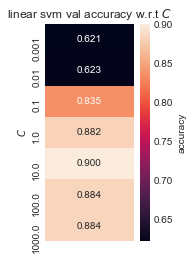

Test Accuracy for Linear SVM =  0.9140386571719227


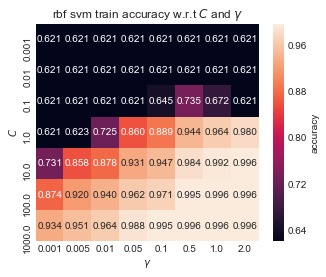

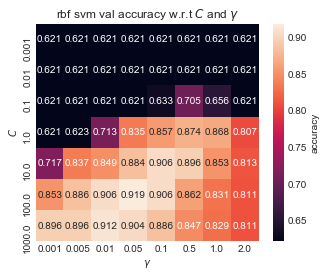

Test Accuracy for RBF SVM =  0.9130213631739573


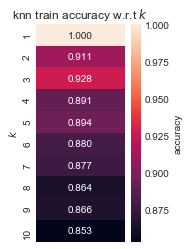

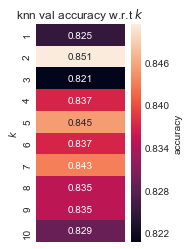

Test Accuracy for K Nearest Neighbors =  0.8245167853509664


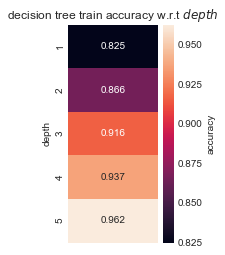

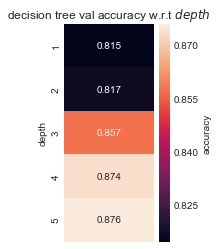

Test Accuracy for Decision Tree =  0.8860630722278738


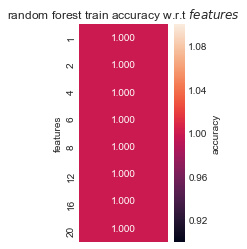

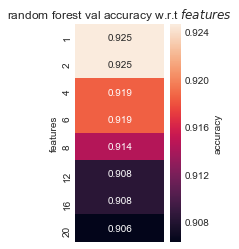

Test Accuracy for Random Forest =  0.9104781281790437


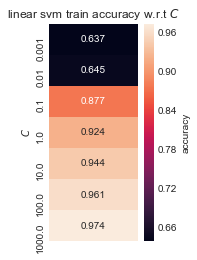

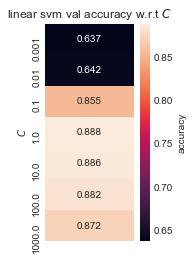

Test Accuracy for Linear SVM =  0.9064089521871821


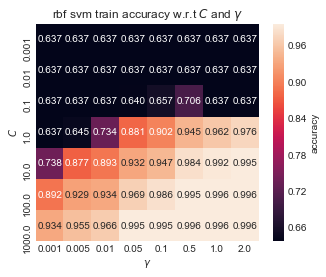

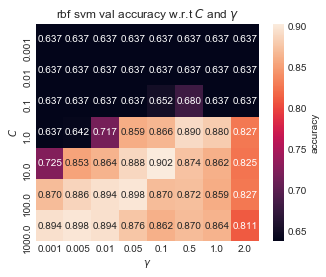

Test Accuracy for RBF SVM =  0.9130213631739573


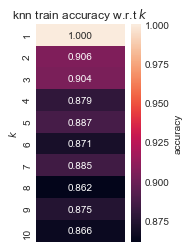

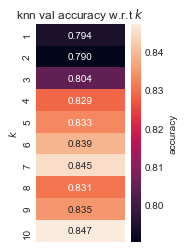

Test Accuracy for K Nearest Neighbors =  0.8433367243133265


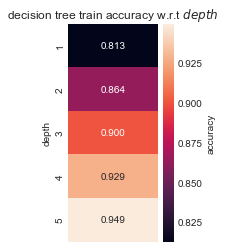

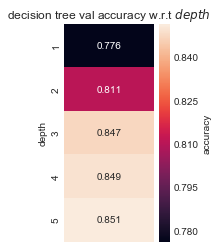

Test Accuracy for Decision Tree =  0.884028484231943


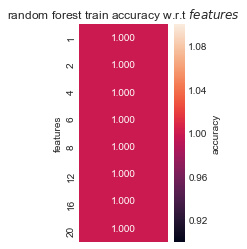

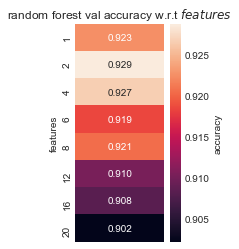

Test Accuracy for Random Forest =  0.9104781281790437


In [19]:
# different train/test partitions 
partitions = [0.8,0.5,0.2]
test_acc_arr = np.zeros((3,5))
train_acc_arr = np.zeros((3,5))
val_acc_arr = np.zeros((3,5))
param_arr = np.zeros((9,6))

# shuffle the data
X_and_Y = spam_dataset.sample(frac=1)
        
X_and_Y = X_and_Y.loc[:2000]
        
# iterate through the different splits 
for i, partition in enumerate(partitions):
    print("Train Partition: ", partition)
    linear_svm_test_acc = []
    rbf_svm_test_acc = []
    knn_test_acc = []
    decision_tree_test_acc = []
    random_forest_test_acc = []
    
    # do three trials for each classifier
    for trial in range(3):
        
        X_and_Y = X_and_Y.sample(frac=1)

        X = X_and_Y.iloc[:, 0:-1] # First column to second last column: Features (numerical values) 
        Y = X_and_Y.iloc[:, -1] # make spam class variable (1 for spam, 0 otherwise)
        
        train_size = int(partition*len(X)) #Find the point where to partition the data
        
        X_train_val = X[:train_size]
        X_test      = X[train_size:]
        Y_train_val = Y[:train_size]
        Y_test      = Y[train_size:]
        
        # scale values from -1 to 1 
        scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train_val)
        X_train_val = scaling.transform(X_train_val)
        X_test = scaling.transform(X_test)
        
        # call each functionn and save the values returnred in appropriate arrays
        test_acc,best_train_0, best_val_0, param_0 = linearSVM()
        linear_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 0] = param_0
        print("Test Accuracy for Linear SVM = ", test_acc)
        
        test_acc,best_train_1, best_val_1, param_1, param_2 = rbfSVM()
        rbf_svm_test_acc.append(test_acc)
        param_arr[i*3 + trial, 1] = param_1
        param_arr[i*3 + trial, 2] = param_2
        print("Test Accuracy for RBF SVM = ", test_acc)
        
        test_acc,best_train_2,best_val_2, param_3 = knn()
        knn_test_acc.append(test_acc)
        param_arr[i*3 + trial, 3] = param_3
        print("Test Accuracy for K Nearest Neighbors = ", test_acc)
        
        test_acc,best_train_3,best_val_3, param_4 = decisionTree()
        decision_tree_test_acc.append(test_acc)
        param_arr[i*3 + trial, 4] = param_4
        print("Test Accuracy for Decision Tree = ", test_acc)

        test_acc, best_train_4, best_val_4, param_5 = randomForest()
        random_forest_test_acc.append(test_acc)
        param_arr[i*3 + trial, 5] = param_5
        print("Test Accuracy for Random Forest = ", test_acc)

    
    # get the average accuracy over the three rounds for training, testing, and validation
    test_acc_arr[i, 0] = sum(linear_svm_test_acc)/3
    test_acc_arr[i, 1] = sum(rbf_svm_test_acc)/3
    test_acc_arr[i, 2] = sum(knn_test_acc)/3
    test_acc_arr[i, 3] = sum(decision_tree_test_acc)/3
    test_acc_arr[i, 4] = sum(random_forest_test_acc)/3

    train_acc_arr[i, 0] = best_train_0
    train_acc_arr[i, 1] = best_train_1
    train_acc_arr[i, 2] = best_train_2
    train_acc_arr[i, 3] = best_train_3
    train_acc_arr[i, 4] = best_train_4

    val_acc_arr[i, 0] = best_val_0
    val_acc_arr[i, 1] = best_val_1
    val_acc_arr[i, 2] = best_val_2
    val_acc_arr[i, 3] = best_val_3
    val_acc_arr[i, 4] = best_val_4

In [20]:
train_df = pd.DataFrame(train_acc_arr)
train_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
train_df.index.name = 'Train Partition'
train_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
train_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.941730,0.948855,0.907379,0.911705,1.0
50,0.932003,0.946257,0.925486,0.917741,1.0
20,0.923618,0.947048,0.865604,0.949069,1.0


In [21]:
val_df = pd.DataFrame(val_acc_arr)
val_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
val_df.index.name = 'Train Partition'
val_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
val_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.919593,0.926209,0.879389,0.891094,0.945547
50,0.916124,0.921824,0.854235,0.885179,0.938925
20,0.887984,0.902240,0.847251,0.851324,0.928717


In [22]:
test_df = pd.DataFrame(test_acc_arr)
test_df.columns = ['Linear SVM', 'RBF SVM', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
test_df.index.name = 'Train Partition'
test_df.rename(index = {0: "80", 1:"50",2 : "20"},inplace = True)
test_df

,Linear SVM,RBF SVM,K Nearest Neighbors,Decision Tree,Random Forest
Train Partition,,,,,
80,0.911924,0.918699,0.870596,0.884824,0.923442
50,0.922973,0.925956,0.876865,0.895579,0.931923
20,0.904205,0.906239,0.841302,0.876229,0.908952


In [23]:
param_df = pd.DataFrame(param_arr)
param_df.columns = ['C-Linear SVM', 'C-RBF SVM', 'Gamma-RBF SVM','K-K Nearest Neighbors', 
                    'Depth-Decision Tree', 'Features-Random Forest']
param_df.index.name = 'Train Partition'
param_df.rename(index = {0: "80", 1:"80",2 : "80", 3: "50", 4:"50", 5: "50", 6: "20", 7:"20", 8: "20"},inplace = True)
param_df

,C-Linear SVM,C-RBF SVM,Gamma-RBF SVM,K-K Nearest Neighbors,Depth-Decision Tree,Features-Random Forest
Train Partition,,,,,,
80,10.0,100.0,0.050,9.0,5.0,1.0
80,100.0,1000.0,0.010,3.0,5.0,4.0
80,1000.0,100.0,0.050,6.0,4.0,1.0
50,100.0,1000.0,0.010,7.0,5.0,2.0
50,10.0,1000.0,0.005,3.0,5.0,4.0
50,10.0,1000.0,0.010,3.0,5.0,4.0
20,10.0,10.0,0.050,9.0,5.0,2.0
20,10.0,100.0,0.050,2.0,5.0,1.0
20,1.0,10.0,0.100,10.0,5.0,2.0
